<a href="https://colab.research.google.com/github/samidhakhatri/Stock-Market-Prediction-using-numerical-and-Textual-analysis/blob/main/StockMarketPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

import seaborn as sns

import nltk
#VADER ( Valence Aware Dictionary for Sentiment Reasoning) is a model used for
# text sentiment analysis that is sensitive to both polarity (positive/negative) and intensity (strength) of emotion.
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
stock_prices=pd.read_csv('drive/MyDrive/^BSESN.csv')

In [ ]:
print(stock_prices.head())
print(stock_prices.size)

         Date          Open          High  ...         Close     Adj Close   Volume
0  2020-01-06  41378.339844  41378.339844  ...  40676.628906  40676.628906   8700.0
1  2020-01-07  40983.039063  41230.140625  ...  40869.468750  40869.468750  11900.0
2  2020-01-08  40574.828125  40866.359375  ...  40817.738281  40817.738281  18200.0
3  2020-01-09  41216.671875  41482.121094  ...  41452.351563  41452.351563   7800.0
4  2020-01-10  41568.199219  41775.109375  ...  41599.718750  41599.718750  13200.0

[5 rows x 7 columns]
1764


In [ ]:
stock_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       250 non-null    float64
 2   High       250 non-null    float64
 3   Low        250 non-null    float64
 4   Close      250 non-null    float64
 5   Adj Close  250 non-null    float64
 6   Volume     250 non-null    float64
dtypes: float64(6), object(1)
memory usage: 13.9+ KB


In [ ]:
stock_headlines=pd.read_csv('drive/MyDrive/india-news-headlines.csv')

In [ ]:
print(stock_headlines.head())
print(stock_headlines.size)

   publish_date  ...                                      headline_text
0      20010101  ...  win over cena satisfying but defeating underta...
1      20010102  ...  Status quo will not be disturbed at Ayodhya; s...
2      20010102  ...                Fissures in Hurriyat over Pak visit
3      20010102  ...              America's unwanted heading for India?
4      20010102  ...                 For bigwigs; it is destination Goa

[5 rows x 3 columns]
9891516


In [ ]:
#converting stock_prices['Date'] object to datetime datatype
stock_prices['Date']=pd.to_datetime(stock_prices['Date'])
stock_prices

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-06,41378.339844,41378.339844,40613.960938,40676.628906,40676.628906,8700.0
1,2020-01-07,40983.039063,41230.140625,40727.371094,40869.468750,40869.468750,11900.0
2,2020-01-08,40574.828125,40866.359375,40476.550781,40817.738281,40817.738281,18200.0
3,2020-01-09,41216.671875,41482.121094,41175.718750,41452.351563,41452.351563,7800.0
4,2020-01-10,41568.199219,41775.109375,41447.800781,41599.718750,41599.718750,13200.0
...,...,...,...,...,...,...,...
247,2020-12-31,47753.109375,47896.968750,47602.121094,47751.328125,47751.328125,13900.0
248,2021-01-01,NaN,NaN,NaN,NaN,NaN,NaN
249,2021-01-04,48109.171875,48220.468750,47594.468750,48176.800781,48176.800781,13900.0
250,2021-01-05,48037.628906,48486.238281,47903.378906,48437.781250,48437.781250,12200.0


In [ ]:
#detecting any null value
stock_prices.isnull().values.any()

True

In [ ]:
#dropping any null value if any
stock_prices.dropna(inplace=True)

In [ ]:
print(stock_prices.head())

        Date          Open          High  ...         Close     Adj Close   Volume
0 2020-01-06  41378.339844  41378.339844  ...  40676.628906  40676.628906   8700.0
1 2020-01-07  40983.039063  41230.140625  ...  40869.468750  40869.468750  11900.0
2 2020-01-08  40574.828125  40866.359375  ...  40817.738281  40817.738281  18200.0
3 2020-01-09  41216.671875  41482.121094  ...  41452.351563  41452.351563   7800.0
4 2020-01-10  41568.199219  41775.109375  ...  41599.718750  41599.718750  13200.0

[5 rows x 7 columns]


In [ ]:
#combine the polarity of news to data and then predict the close price
# i.e. close price is to be determined

In [ ]:
stock_headlines

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa
...,...,...,...
3297167,20200630,gadgets-news,why tiktok removed 1 65 crore videos in india
3297168,20200630,entertainment.hindi.bollywood,apurva asrani calls alia bhatts mother soni ra...
3297169,20200630,entertainment.hindi.bollywood,kangana ranaut gets a doll version of herself ...
3297170,20200630,entertainment.hindi.bollywood,meezaan jaffrey reminisces his childhood days ...


In [ ]:
#converting stock_prices['Date'] object to datetime datatype
stock_headlines['publish_date'] = pd.to_datetime(stock_headlines['publish_date'],format= '%Y%m%d')
stock_headlines

,publish_date,headline_category,headline_text
0,2001-01-01,sports.wwe,win over cena satisfying but defeating underta...
1,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...
2,2001-01-02,unknown,Fissures in Hurriyat over Pak visit
3,2001-01-02,unknown,America's unwanted heading for India?
4,2001-01-02,unknown,For bigwigs; it is destination Goa
...,...,...,...
3297167,2020-06-30,gadgets-news,why tiktok removed 1 65 crore videos in india
3297168,2020-06-30,entertainment.hindi.bollywood,apurva asrani calls alia bhatts mother soni ra...
3297169,2020-06-30,entertainment.hindi.bollywood,kangana ranaut gets a doll version of herself ...
3297170,2020-06-30,entertainment.hindi.bollywood,meezaan jaffrey reminisces his childhood days ...


In [ ]:
#dropping any duplicate value
stock_headlines.drop_duplicates()

,publish_date,headline_category,headline_text
0,2001-01-01,sports.wwe,win over cena satisfying but defeating underta...
1,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...
2,2001-01-02,unknown,Fissures in Hurriyat over Pak visit
3,2001-01-02,unknown,America's unwanted heading for India?
4,2001-01-02,unknown,For bigwigs; it is destination Goa
...,...,...,...
3297167,2020-06-30,gadgets-news,why tiktok removed 1 65 crore videos in india
3297168,2020-06-30,entertainment.hindi.bollywood,apurva asrani calls alia bhatts mother soni ra...
3297169,2020-06-30,entertainment.hindi.bollywood,kangana ranaut gets a doll version of herself ...
3297170,2020-06-30,entertainment.hindi.bollywood,meezaan jaffrey reminisces his childhood days ...


In [ ]:
#taking only publish_date column and headline_text
stock_headlines = stock_headlines.filter(['publish_date', 'headline_text'])

In [ ]:
# grouping the news headlines according to Date
stock_headlines = stock_headlines.groupby(['publish_date'])['headline_text'].apply(lambda x: ','.join(x)).reset_index()

In [ ]:
#sorting the values according to publish_date
stock_headlines=stock_headlines.sort_values(by='publish_date')

In [ ]:
stock_headlines

,publish_date,headline_text
0,2001-01-01,win over cena satisfying but defeating underta...
1,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
2,2001-01-03,"Powerless north India gropes in the dark,Think..."
3,2001-01-04,The string that pulled Stephen Hawking to Indi...
4,2001-01-05,Light combat craft takes India into club class...
...,...,...
7075,2020-06-26,Containment zone residents slam high prices ch...
7076,2020-06-27,like me i wont let you have a toxic relationsh...
7077,2020-06-28,Atanu Ghosh plans to rewrite old scripts to ma...
7078,2020-06-29,6 hot and stylish bikini looks of Katrina Kaif...


In [ ]:
#renaming column 'publish_date' to 'Date'
stock_headlines.columns=['Date','headline_text']

In [ ]:
stock_headlines

,Date,headline_text
0,2001-01-01,win over cena satisfying but defeating underta...
1,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
2,2001-01-03,"Powerless north India gropes in the dark,Think..."
3,2001-01-04,The string that pulled Stephen Hawking to Indi...
4,2001-01-05,Light combat craft takes India into club class...
...,...,...
7075,2020-06-26,Containment zone residents slam high prices ch...
7076,2020-06-27,like me i wont let you have a toxic relationsh...
7077,2020-06-28,Atanu Ghosh plans to rewrite old scripts to ma...
7078,2020-06-29,6 hot and stylish bikini looks of Katrina Kaif...


In [ ]:
#merging stock_prices and stock_headlines w.r.t to date
stock_data=pd.merge(stock_prices,stock_headlines, on='Date')

In [ ]:
stock_data

,Date,Open,High,Low,Close,Adj Close,Volume,headline_text
0,2020-01-06,41378.339844,41378.339844,40613.960938,40676.628906,40676.628906,8700.0,With captive pics and posts; city shining on s...
1,2020-01-07,40983.039063,41230.140625,40727.371094,40869.468750,40869.468750,11900.0,"Pro-CAA campaign in Bettiah turns unruly,Holy ..."
2,2020-01-08,40574.828125,40866.359375,40476.550781,40817.738281,40817.738281,18200.0,"Seems like systematic assault; say students,Co..."
3,2020-01-09,41216.671875,41482.121094,41175.718750,41452.351563,41452.351563,7800.0,"Health fix: Quick meals in your mason jar,Dead..."
4,2020-01-10,41568.199219,41775.109375,41447.800781,41599.718750,41599.718750,13200.0,Locate more zones to accommodate vendors: Punj...
...,...,...,...,...,...,...,...,...
114,2020-06-24,35679.738281,35706.550781,34794.929688,34868.980469,34868.980469,26600.0,I never thought I had a voice until today: Vid...
115,2020-06-25,34525.390625,35081.609375,34499.781250,34842.101563,34842.101563,24600.0,Truck firms look for new export markets to sel...
116,2020-06-26,35144.781250,35254.878906,34910.339844,35171.269531,35171.269531,24800.0,Containment zone residents slam high prices ch...
117,2020-06-29,34926.949219,35032.359375,34662.058594,34961.519531,34961.519531,18300.0,6 hot and stylish bikini looks of Katrina Kaif...


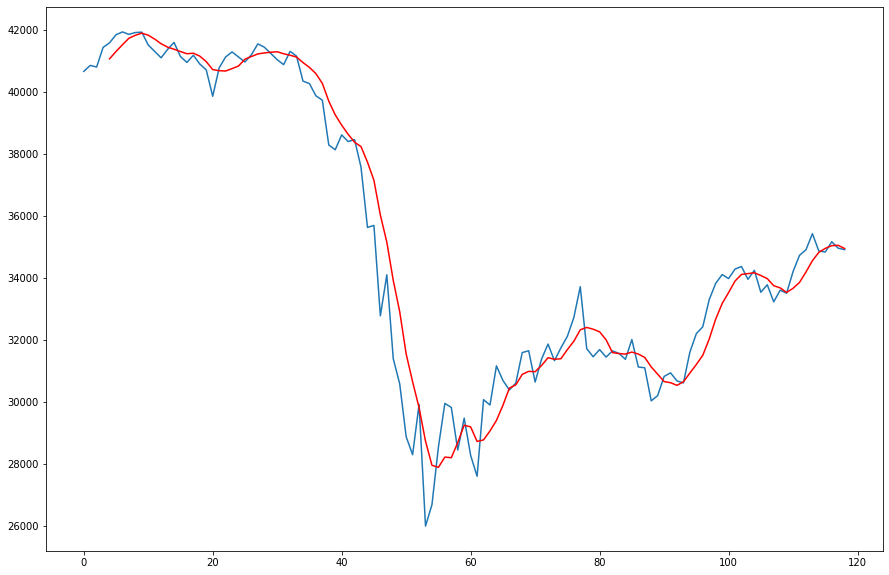

In [ ]:
# setting figure size
plt.figure(figsize=(15,10))

# plotting the close price and  rolling mean of close price
stock_data['Close'].plot()
mean=stock_data['Close'].rolling(window=5).mean()

mean.plot(color = 'r', label = 'Rolling Mean')


In [ ]:
#doing the sentiment analysis of the headlines
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
print('Start calculating sentiment scores:')

stock_data['compound'] = stock_data['headline_text'].apply(lambda x: sid.polarity_scores(x)['compound'])
print('Compound Done')

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


Start calculating sentiment scores:
Compound Done


Text(0, 0.5, 'Close Price (INR)')

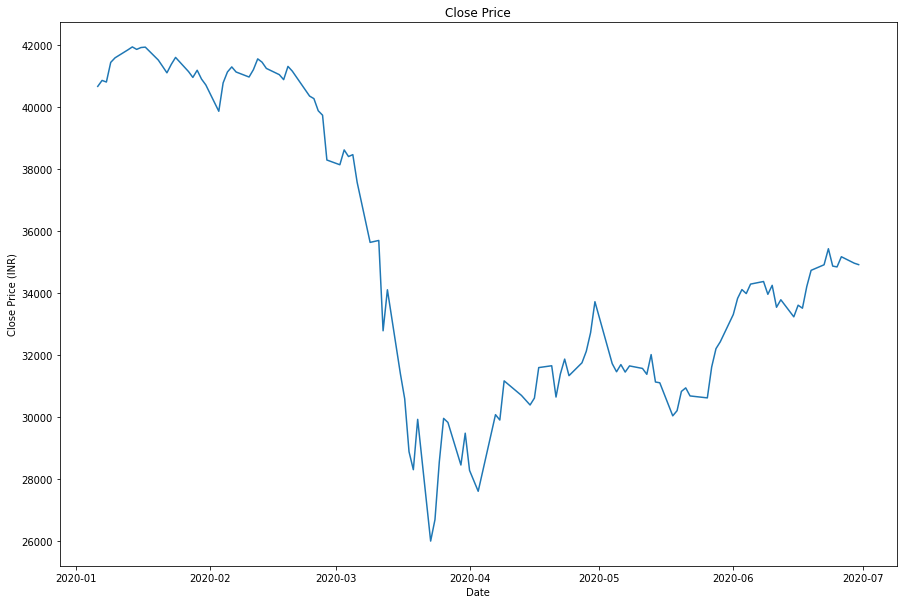

In [ ]:
#Setting plot size and labels
plt.figure(figsize=(15,10))

plt.plot(stock_data['Date'],stock_data['Close'])


plt.title("Close Price")
plt.xlabel('Date')
plt.ylabel('Close Price (INR)')

In [ ]:
stock_data

,Date,Open,High,Low,Close,Adj Close,Volume,headline_text,compound
0,2020-01-06,41378.339844,41378.339844,40613.960938,40676.628906,40676.628906,8700.0,With captive pics and posts; city shining on s...,-0.9995
1,2020-01-07,40983.039063,41230.140625,40727.371094,40869.468750,40869.468750,11900.0,"Pro-CAA campaign in Bettiah turns unruly,Holy ...",-1.0000
2,2020-01-08,40574.828125,40866.359375,40476.550781,40817.738281,40817.738281,18200.0,"Seems like systematic assault; say students,Co...",-0.9999
3,2020-01-09,41216.671875,41482.121094,41175.718750,41452.351563,41452.351563,7800.0,"Health fix: Quick meals in your mason jar,Dead...",-0.9997
4,2020-01-10,41568.199219,41775.109375,41447.800781,41599.718750,41599.718750,13200.0,Locate more zones to accommodate vendors: Punj...,-0.9999
...,...,...,...,...,...,...,...,...,...
114,2020-06-24,35679.738281,35706.550781,34794.929688,34868.980469,34868.980469,26600.0,I never thought I had a voice until today: Vid...,-0.9997
115,2020-06-25,34525.390625,35081.609375,34499.781250,34842.101563,34842.101563,24600.0,Truck firms look for new export markets to sel...,-0.9999
116,2020-06-26,35144.781250,35254.878906,34910.339844,35171.269531,35171.269531,24800.0,Containment zone residents slam high prices ch...,-0.9999
117,2020-06-29,34926.949219,35032.359375,34662.058594,34961.519531,34961.519531,18300.0,6 hot and stylish bikini looks of Katrina Kaif...,-0.9997


In [ ]:
# dropping unwanted 'headline_text' and rearranging columns
stock_data.drop(['headline_text'], inplace=True, axis=1)
stock_data = stock_data[[ 'Open', 'High', 'Low', 'Volume', 'compound', 'Close']]

# final stock_data
stock_data.head()

,Open,High,Low,Volume,compound,Close
0,41378.339844,41378.339844,40613.960938,8700.0,-0.9995,40676.628906
1,40983.039063,41230.140625,40727.371094,11900.0,-1.0000,40869.468750
2,40574.828125,40866.359375,40476.550781,18200.0,-0.9999,40817.738281
3,41216.671875,41482.121094,41175.718750,7800.0,-0.9997,41452.351563
4,41568.199219,41775.109375,41447.800781,13200.0,-0.9999,41599.718750


In [ ]:
X=stock_data.iloc[:,:-1].values
Y=stock_data.iloc[:,-1].values

In [ ]:
#splitting the dataset into training and test set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)


In [ ]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)


In [ ]:
#data modelling
import xgboost 
xgb = xgboost.XGBRegressor()
xgb.fit(X_train, Y_train)

[07:56:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
#gettign the prediction
predictions = xgb.predict(X_test)

361035.20621838025


Text(0, 0.5, 'Stock Price')

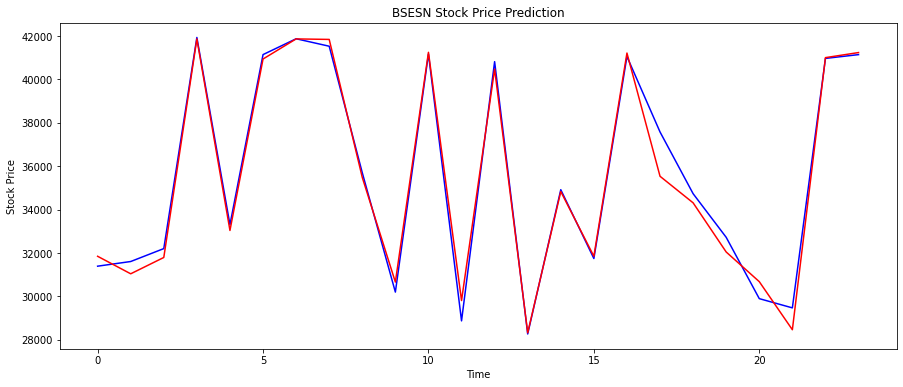

In [ ]:
#plotting prediction w.r.t Y_test
plt.figure(figsize=(15,6))
plt.plot(Y_test, label='Test', color='b')
plt.plot(predictions, label='Prediction', color='r')
plt.title('BSESN Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')